## Tutorial 11

In [14]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
from scipy.stats import binom, gamma, norm, poisson, uniform
import matplotlib.pyplot as plt
path = "../../src/"
# Random Number Generator
rng = np.random.default_rng(2137)

In [ ]:
U = uniform.rvs(0, 1, size=1000, random_state=rng)
X = np.exp(U**2)
X_bar = np.mean(X)
s = np.std(X)
z = stats.norm.ppf(0.975) # get z-score
upper_ci = X_bar + z * s / np.sqrt(1000)
lower_ci = X_bar - z * s / np.sqrt(1000)
print(lower_ci, upper_ci)

1.41966560483202 1.476978514260275


In [11]:
def oneSample():
    N = 0
    sum = 0
    while sum < 1:
        sum = sum + uniform.rvs(0, 1, size=1, random_state=rng)
        N = N + 1
    return N

sample = np.array([oneSample() for i in range(1000)])
est = np.mean(sample)
print(est)
z = stats.norm.ppf(0.975)
sd = np.std(sample)
upr_ci = est + z * sd / np.sqrt(1000)
lwr_ci = est - z * sd / np.sqrt(1000)
print(lwr_ci, upr_ci)


2.736
2.6821703821833665 2.789829617816634


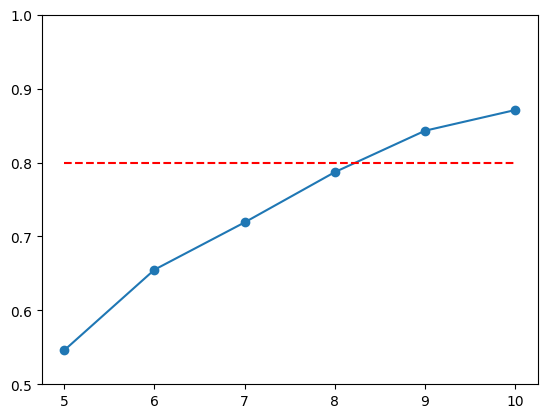

In [ ]:
def oneSample(n):
    X = norm.rvs(0, 1, size=n, random_state=rng)
    Y = norm.rvs(1.5, 1, size=n, random_state=rng)
    t_out = stats.ttest_ind(X, Y)
    if t_out.pvalue < 0.05:
        return 1
    else:
        return 0
    
def propSample(n):
    sample = np.array([oneSample(n) for j in range(1000)])
    return np.mean(sample)

obs = np.array([propSample(i) for i in np.arange(5,11)])
plt.plot(np.arange(5,11), obs)
plt.scatter(np.arange(5,11), obs)
plt.ylim(0.5, 1)
plt.hlines(0.8, 5, 10, color="red", linestyles="dashed")

In [47]:
def oneGame():
    X = norm.rvs(115.8, 11.2, size=1, random_state=rng)
    Y = norm.rvs(109.5 + 0.7 * 10.6 / 11.2 * (X - 115.8), 10.6 * np.sqrt(1-0.7**2), size=1, random_state=rng)
    if X > Y:
        return 'Denver'
    else:
        return 'Miami'

def oneSeries():
    Dsum = 0
    Msum = 0
    while (Dsum < 4 and Msum < 4):
        if oneGame() == 'Denver':
            Dsum += 1
        else:
            Msum += 1
    result = 1 if Dsum > Msum else 0
    n_games = Dsum + Msum
    return result, n_games

sim = np.array([oneSeries() for i in range(1000)])
np.mean(sim, axis=0)
np.size(np.where(sim[:,1] == 7))/1000

0.122